# GEOG5990M Final Assignment - RESIT

Student ID number: <font color = red>[201888942]</font>

### Assignment Details

This assignment should use this Jupyter Notebook to document the investigation and interpretation of the relationship between AirBNB property rentals and area characteristics (data provided) in Bristol.

A full overview of the data provided can be found below.

These data should be suitably joined and pre-processed to provide insight and two polished data visualisations produced to communicate the results of the analysis.

- The Jupyter notebook should follow the data science process outlined in the module.
- You should use markdown cells to explain and justify the steps taken in the code.
- Whilst you should use visualisations throughout for data exploration, please present two final visualisations to communicate your ‘public good’ insight, one spatial and one non-spatial.
- For both these visualisations indicate your intended audience (e.g. academic, the public, policymakers, business stakeholders)
- AND the subsequent data visualisation choices that have been made to ensure these outputs are suitable for this audience.


The Jupyter notebook <b>markdown word count</b> is limited to <b>1500 words.</b>    

Please upload the Jupyter Notebook and all files need to run the notebook analysis as a zip file using the 'Zip file upload' option of Turnitin. Contained within the zip folder please also submit a .txt file with a link to your GitHub repository

### Assessment Information

##### You will be assessed on the following:

- **Readability of the Jupyter notebook including markdown cells and commented code (5%)**
- **Logical Flow of the Jupyter notebook (5%)**
- **Data cleaning (30%), including:**
    -  Exploratory data description (with citations where appropriate)
    - Justification of data cleaning choices (with citations where appropriate)
    - Data visualisation to aid data cleaning
- **Statistical modelling/ quantification of the association between your chosen variables (10%):**
    - Effective interpretation of the model
    - Justification of model chosen
    - Potential models include: k-means, spearman’s rank, predictive model (e.g. OLS)
- **Data Visualisation of end results: (30%)**
    - This should include one spatial and one non-spatial visualisation
    - Evidence of modifying visualisations to make them:
        - Accessible (colour blind audience etc.)
        - Easy to interpret
        - Readable (e.g. change variable names from how they have been presented in original table to improve understanding)
    - Explanation of data visualisation choices (with citations where appropriate)
    - Evidence of critical selection of chosen visualisations to present (with citations where appropriate)
- **Reproducibility (20%)**
    - You should ensure all the data and steps to produce the analysis undertaken is reproducible
    - You should create a <font color = red><b>GitHub repository with suitable documentation</b></font>. This should include an introductory markdown (readme) file explaining:
        -  The background/context of the project
        -  What data the GitHub repository contains
        -  What the code aims to do
        -  Any further information someone might need to be able to run your code and reproduce your analysis
    -  All files needed to run the analysis
    -  Your .ipynb notebook


The Jupyter notebook will be marked against the SoG generic marking criteria and specifically the following additional criteria:
- Understanding of task
- Structure and flow of the report
- Breadth of content
- Reading and referencing
- Aesthetics and design
- Writing / presentation
- Data


## Data Overview
### AirBNB  data
A sample of AirBNB data for Bristol has been collected for you.
AirBNB is a company operating that operates an online marketplace for short- and long-term homestays and experiences. It is often used to book holiday stays. The data provided includes...


| Field | Description |
|---|---|
| id | Airbnb's unique identifier for the listing |
| name |  |
| host_id |  |
| host_name |  |
| neighbourhood_group | The neighbourhood group as geocoded using the latitude and longitude against neighborhoods as defined by open or public digital shapefiles. |
| neighbourhood | The neighbourhood as geocoded using the latitude and longitude against neighborhoods as defined by open or public digital shapefiles. |
| latitude | Uses the World Geodetic System (WGS84) projection for latitude and longitude. |
| longitude | Uses the World Geodetic System (WGS84) projection for latitude and longitude. |
| price | daily price in local currency. Note, $ sign may be used despite locale |
| minimum_nights | minimum number of night stay for the listing (calendar rules may be different) |
| number_of_reviews | The number of reviews the listing has |
| last_review | The date of the last/newest review |
| calculated_host_listings_count | The number of listings the host has in the current scrape, in the city/region geography. |
| availability_365 | avaliability_x. The availability of the listing x days in the future as determined by the calendar. Note a listing may be available because it has been booked by a guest or blocked by the host. |
| number_of_reviews_ltm | The number of reviews the listing has (in the last 12 months) |
| license |  |
| property_type | Self selected property type. Hotels and Bed and Breakfasts are described as such by their hosts in this field |
| room_type | All homes are grouped into the following three room types: Entire place, Private room, Shared room, Hotel |
| accommodates | The maximum capacity of the listing |
| bathrooms | The number of bathrooms in the listing |
| bathrooms_text | The number of bathrooms in the listing.  On the Airbnb web-site, the bathrooms field has evolved from a number to a textual description. For older scrapes, bathrooms is used. |
| bedrooms | The number of bedrooms |
| beds | The number of bed(s) |
| amenities |  |


### Access to Healthy Assets and Hazards (AHAH) Data

AHAH (the index of ‘Access to Health Assets and Hazards’) is a multi-dimensional index developed by the CDRC for Great Britain measuring how ‘healthy’ neighbourhoods are. The AHAH index combines indicators under four different domains of accessibility:

- Retail environment (access to fast food outlets, pubs, tobacconists, gambling outlets),
- Health services (access to GPs, hospitals, pharmacies, dentists, leisure services),
- Physical environment (Blue Space, Green Space - Passive), and
- Air quality (NO₂, PM10, SO₂).

Please look at the full AHAH metadata on the CDRC website, make sure you understand what each of the variables are showing you
https://data.cdrc.ac.uk/dataset/access-healthy-assets-hazards-ahah

In [145]:
# import required packages
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt

In [146]:
# read in AirBnB Data
airbnb =pd.read_csv('airbnb_data_bristol.csv')
# read in AHAH index data
ahah = gpd.read_file('bristol_ahah_index.geojson')

In [147]:
#Exploring the Bristol AHAH data
ahah.head()

,FID,LSOA11CD,LSOA11NM,LSOA11NMW,BNG_E,BNG_N,LONG,LAT,GlobalID,lsoa11,...,ah3e_rnk,ah3r_rnk,ah3h_pct,ah3g_pct,ah3e_pct,ah3r_pct,ah3ahah,ah3ahah_rn,ah3ahah_pc,geometry
0,14053,E01014485,Bristol 023A,Bristol 023A,360020,174735,-2.57697,51.47015,3edee4ae-aa59-4e9e-8066-fd81222d4d4d,E01014485,...,33816,31832,30,80,82,77,28.100961,33416,81,"POLYGON ((-2.56785 51.46891, -2.57002 51.46804..."
1,14054,E01014486,Bristol 023B,Bristol 023B,359924,174186,-2.57829,51.46521,756ec26e-f1c8-4911-ad30-ff9aab76e295,E01014486,...,33949,35387,13,67,82,85,26.761410,32088,77,"POLYGON ((-2.5736 51.46692, -2.57992 51.4619, ..."
2,14055,E01014487,Bristol 020A,Bristol 020A,359244,174738,-2.58814,51.47013,3b905c75-f6aa-42c6-8347-f96f779a7b75,E01014487,...,31217,35558,24,79,75,86,28.393144,33716,81,"POLYGON ((-2.58707 51.47168, -2.58391 51.47269..."
3,14056,E01014488,Bristol 023C,Bristol 023C,359701,174621,-2.58155,51.46911,266e675c-152b-4827-abb0-c9424d7b485f,E01014488,...,34627,32437,17,49,83,78,22.955942,26901,65,"POLYGON ((-2.58002 51.4697, -2.57762 51.46883,..."
4,14057,E01014489,Bristol 023D,Bristol 023D,359346,174262,-2.58662,51.46585,b608a9d9-8976-4047-b4c5-a5dbf541d1ac,E01014489,...,33597,36565,5,83,81,88,30.566093,35495,86,"POLYGON ((-2.58258 51.4671, -2.58309 51.46534,..."


In [148]:
#Exploring the missing values in AHAH data
ahah.isnull().sum()

,0
FID,0
LSOA11CD,0
LSOA11NM,0
LSOA11NMW,0
BNG_E,0
...,...
ah3r_pct,0
ah3ahah,0
ah3ahah_rn,0
ah3ahah_pc,0


In [149]:
#Exploring the crs
ahah.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [150]:
#Exploring the AirBNB data
airbnb.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type_x,...,license,property_type,room_type_y,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,LSOA11CD
0,0,70820,Townhouse in Bristol · ★4.77 · 1 bedroom · 1 b...,360195,Sarah,NaN,Windmill Hill,51.43843,-2.59183,Private room,...,NaN,Private room in townhouse,Private room,2,NaN,1 shared bath,NaN,1.0,[],E01014734
1,1,117122,Condo in Bristol · ★4.96 · 1 bedroom · 1 bed ·...,591555,Marcus,NaN,Hotwells & Harbourside,51.44976,-2.61000,Private room,...,NaN,Private room in condo,Private room,2,NaN,2.5 shared baths,NaN,1.0,[],E01033350
2,2,176306,Townhouse in Bristol · ★4.79 · 1 bedroom · 1 b...,708175,Orla,NaN,Southville,51.44174,-2.60297,Private room,...,NaN,Private room in townhouse,Private room,2,NaN,1 shared bath,NaN,1.0,[],E01014698
3,3,307634,Townhouse in Bristol · ★4.65 · 1 bedroom · 1 b...,1582810,Wendy,NaN,Easton,51.46487,-2.55690,Private room,...,NaN,Private room in townhouse,Private room,2,NaN,1.5 shared baths,NaN,1.0,[],E01014570
4,4,390781,Home in Bristol · ★4.89 · 1 bedroom · 1 bed · ...,1954565,Fiona,NaN,Brislington West,51.44444,-2.55783,Private room,...,NaN,Private room in home,Private room,1,NaN,1 shared bath,NaN,1.0,[],E01014531


In [151]:
#Exploring the missing values in AirBNB data
airbnb.isnull().sum()

,0
Unnamed: 0,0
id,0
name,0
host_id,0
host_name,0
neighbourhood_group,2556
neighbourhood,0
latitude,0
longitude,0
room_type_x,0


After importing the packages and two datasets of AirBNB in Bristol which is in '.csv' format and Access to Healthy Assets and Hazards (AHAH) Data which is in '.geojson' format, the datasets were explored and lookedup for any missing values. The results shows that the Access to Healthy Assets and Hazards (AHAH) Datasets had no missing values but the AirBNB dataset of Bristol had many missing values for different variables.

In [152]:
#Dropping rows with missing values
bnb = airbnb.dropna(subset=["LSOA11CD"])

In [153]:
# joining the two dataset
database = bnb.merge(ahah, left_on='LSOA11CD', right_on='LSOA11CD', how='left')

In [154]:
#Exploring the joined datasets
database.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type_x,...,ah3e_rnk,ah3r_rnk,ah3h_pct,ah3g_pct,ah3e_pct,ah3r_pct,ah3ahah,ah3ahah_rn,ah3ahah_pc,geometry
0,0,70820,Townhouse in Bristol · ★4.77 · 1 bedroom · 1 b...,360195,Sarah,NaN,Windmill Hill,51.43843,-2.59183,Private room,...,30309,34136,29,71,73,82,25.508343,30683,74,"POLYGON ((-2.5843 51.43746, -2.59196 51.43807,..."
1,1,117122,Condo in Bristol · ★4.96 · 1 bedroom · 1 bed ·...,591555,Marcus,NaN,Hotwells & Harbourside,51.44976,-2.61000,Private room,...,27331,21647,75,34,66,52,20.074230,21344,52,"POLYGON ((-2.62241 51.44875, -2.61057 51.45004..."
2,2,176306,Townhouse in Bristol · ★4.79 · 1 bedroom · 1 b...,708175,Orla,NaN,Southville,51.44174,-2.60297,Private room,...,26948,40149,4,57,65,97,27.870102,33161,80,"POLYGON ((-2.60009 51.44449, -2.6021 51.44137,..."
3,3,307634,Townhouse in Bristol · ★4.65 · 1 bedroom · 1 b...,1582810,Wendy,NaN,Easton,51.46487,-2.55690,Private room,...,34691,29181,35,84,84,70,29.097455,34359,83,"POLYGON ((-2.55102 51.46396, -2.55386 51.46289..."
4,4,390781,Home in Bristol · ★4.89 · 1 bedroom · 1 bed · ...,1954565,Fiona,NaN,Brislington West,51.44444,-2.55783,Private room,...,30857,36647,52,75,74,88,30.846785,35715,86,"POLYGON ((-2.55428 51.44481, -2.55655 51.44318..."


As we need to merge the two datasets together using a common ID and we would be using 'LSOA11CD' variable which is a common in both of the datasets. Earlier while exploration it was found that the AirBNB dataset 'LSOA11CD' variable had missing values which is why we used drop function to remove missing rows to avoid any errors.

In [155]:
# Convert bnb DataFrame to a GeoDataFrame
gdf_airbnb = gpd.GeoDataFrame(
    bnb,
    geometry=gpd.points_from_xy(bnb.longitude, bnb.latitude),
    crs="EPSG:4326"  # Assuming WGS84 coordinate system
)

In [156]:
#  Count number of Airbnbs per LSOA
bnb_count = gdf_airbnb.groupby("LSOA11CD").size().reset_index(name="bnb_count")
#  Merge with AHAH data
ahah_bnbcount = ahah.merge(bnb_count, on="LSOA11CD", how="left")

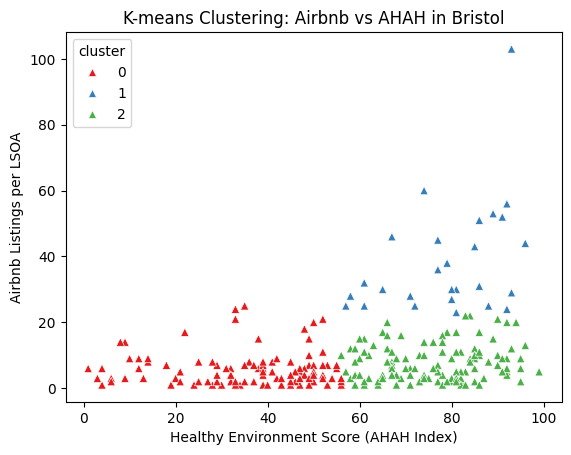

In [157]:
#creating a non-spatial visualiztion using k-means

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features for clustering
features = ahah_bnbcount[["bnb_count", "ah3ahah_pc"]].fillna(0)

# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Running k-means
kmeans = KMeans(n_clusters=3, random_state=42)
ahah_bnbcount["cluster"] = kmeans.fit_predict(scaled_features)

# Visualize clusters
sns.scatterplot(
    data=ahah_bnbcount,
    x="ah3ahah_pc", y="bnb_count",
    hue="cluster", palette="Set1",
     marker="^"
)
plt.xlabel("Healthy Environment Score (AHAH Index)")
plt.ylabel("Airbnb Listings per LSOA")
plt.title("K-means Clustering: Airbnb vs AHAH in Bristol")
plt.show()


For the initial analysis of the given dataset of AirBNB and AHAH index of Bristol, on exploration it was decided to chose the 'ah3ahah_pc' variable which is the AHAH Index percentiles for the different areas of the Bristol and the number of AirBNB listings in the different part of the city. For clustering all the different AirBNB according to there LSOA 'groupby' function was used for the analysis to take place.
The aim of the analysis is to study the distribution of AirBNB in relation to the index of ‘Access to Health Assets and Hazards’.
The k-means shows that Airbnb listings in Bristol are more concentrated in areas with higher AHAH index percentiles, which represent less healthy environments. In neighbourhoods with lower AHAH scores indicating better access to green space, cleaner air, and overall healthier conditions.The clustering in the k-means reveals three patterns areas which are high Airbnb listings and low environmental health, areas with low Airbnb and high AHAH scores, and a middle group with moderate values. These spatial groupings highlight how tourism activity may align with urban health disparities across Bristol.

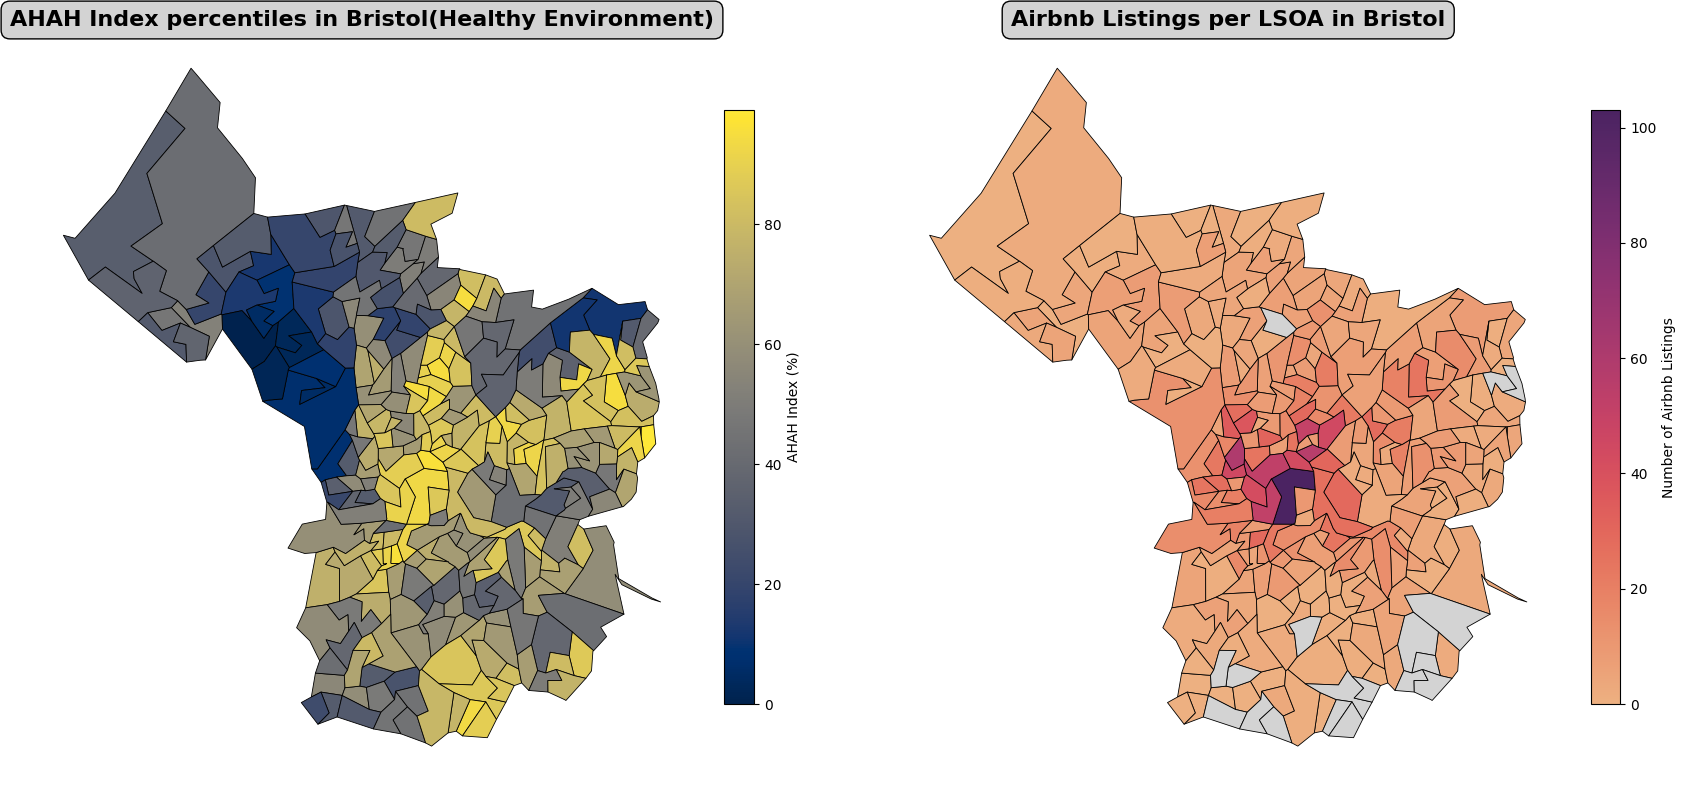

In [158]:
#Creating a spatial visualization for Compare AHAH Index and Airbnb Listings Side by Side

fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Using color palettes which are suitable for colour blind
cmap_ahah = sns.color_palette("cividis", as_cmap=True)
cmap_airbnb = sns.color_palette("flare", as_cmap=True)

# Map of AHAH Index

ahah_bnbcount.plot(
    column="ah3ahah_pc",
    cmap=cmap_ahah,
    linewidth=0.6,
    edgecolor="black",
    legend=False,
    ax=axes[0],
    missing_kwds={'color': 'lightgrey'}  # Grey areas are the missing data
)

# Adding colorbar for AHAH map
norm_ahah = plt.Normalize(vmin=0, vmax=ahah_bnbcount["ah3ahah_pc"].max())
colorbar_ahah = plt.cm.ScalarMappable(cmap=cmap_ahah, norm=norm_ahah)
colorbar_ahah.set_array([])
cbar = fig.colorbar(colorbar_ahah, ax=axes[0], orientation="vertical",
                    fraction=0.035, pad=0.04)
cbar.set_label("AHAH Index (%)")

# Style of the title
axes[0].set_title(
    "AHAH Index percentiles in Bristol(Healthy Environment)",
    fontsize=16,
    fontweight="bold",
    bbox=dict(facecolor="lightgray", edgecolor="black", boxstyle="round,pad=0.4"),
    loc="center"
)
axes[0].axis("off")  # Turn off grid/axes for a clean map

# Map of Airbnb Listings

ahah_bnbcount.plot(
    column="bnb_count",
    cmap=cmap_airbnb,
    linewidth=0.6,
    edgecolor="black",
    legend=False,
    ax=axes[1],
    missing_kwds={'color': 'lightgrey'}
)

# Add colorbar for Airbnb map
norm_airbnb = plt.Normalize(vmin=0, vmax=ahah_bnbcount["bnb_count"].max())
colorbar_airbnb = plt.cm.ScalarMappable(cmap=cmap_airbnb, norm=norm_airbnb)
colorbar_airbnb.set_array([])
cbar = fig.colorbar(colorbar_airbnb, ax=axes[1], orientation="vertical",
                    fraction=0.035, pad=0.04)
cbar.set_label("Number of Airbnb Listings")

# Style the title
axes[1].set_title(
    "Airbnb Listings per LSOA in Bristol",
    fontsize=16,
    fontweight="bold",
    bbox=dict(facecolor="lightgray", edgecolor="black", boxstyle="round,pad=0.4"),
    loc="center"
)
axes[1].axis("off")

# Adjusting layout of maps and legends
plt.tight_layout()
plt.show()


For the final analysis of the given dataset a spatial visualization was prepared,this visualization helps in delineating the distribution and spatial analysis of the given data very well. The choropleth maps reveal a spatial disparity between AHAH Index and AirBNB across Bristol. The map indicate us that the areas those scoring high on the AHAH Index tend to be on the outskirts of Bristol. Meanwhile, the places with the most Airbnb listings are clustered right in the heart of the city, where environmental scores are noticeably lower but the accesiblity to retail and health services is closer,some areas had missing values which is why they are been represented as grey in the map. This contrast suggests that the parts of Bristol most popular with tourists may also be the ones facing greater environmental pressures. It’s a pattern that raises important questions about how short-term rentals and urban health interact, and what that means for planning a city that’s both vibrant and livable.

Acknowledgement:
I acknowledge the use of Microsoft Copilot (Co Pilot, https://copilot.microsoft.com/chats/mNdTZ381WF4J3fqtaFFP3) to understand the error code.